In [3]:
!pip install matplotlib Image

  Using cached matplotlib-3.7.5-cp38-cp38-win_amd64.whl (7.5 MB)
  Using cached image-1.5.33.tar.gz (15 kB)
  Using cached importlib_resources-6.4.5-py3-none-any.whl (36 kB)
  Using cached kiwisolver-1.4.7-cp38-cp38-win_amd64.whl (55 kB)
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
  Using cached pyparsing-3.1.4-py3-none-any.whl (104 kB)
  Using cached contourpy-1.1.1-cp38-cp38-win_amd64.whl (477 kB)
  Using cached fonttools-4.57.0-cp38-cp38-win_amd64.whl (1.5 MB)
  Using cached django-4.2.23-py3-none-any.whl (8.0 MB)
  Using cached asgiref-3.8.1-py3-none-any.whl (23 kB)
  Using cached backports.zoneinfo-0.2.1-cp38-cp38-win_amd64.whl (38 kB)
Using legacy 'setup.py install' for Image, since package 'wheel' is not installed.
    Running setup.py install for Image: started
    Running setup.py install for Image: finished with status 'done'


You should consider upgrading via the 'd:\summer_2025\aic\venv\scripts\python.exe -m pip install --upgrade pip' command.


In [4]:
import os
from glob import glob
import matplotlib.pyplot as plt
from PIL import Image

import torch
from torchvision import transforms, datasets
from torch.utils.data import DataLoader, Dataset

In [5]:
# 📂 Step 2: Load Image Paths
image_paths = glob(r"D:/Summer_2025/AIC/Data/L01_V001/*.jpg")

print(f"Found {len(image_paths)} images.")


Found 272 images.


In [6]:
# 🧼 Step 3: Define Image Transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),                  # Resize to 224x224
    transforms.RandomHorizontalFlip(p=0.5),         # Random flip
    transforms.ToTensor(),                          # Convert to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406],  # Normalize
                         std=[0.229, 0.224, 0.225])
])


In [7]:
# 🧩 Step 4: Create Custom Dataset (Optional)
class ImageDataset(Dataset):
    def __init__(self, image_paths, transform=None):
        self.image_paths = image_paths
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image = Image.open(self.image_paths[idx]).convert('RGB')
        if self.transform:
            image = self.transform(image)
        return image

# Instantiate dataset
dataset = ImageDataset(image_paths, transform=transform)


In [8]:
# 📦 Step 5: Create DataLoader
dataloader = DataLoader(dataset, batch_size=8, shuffle=True)


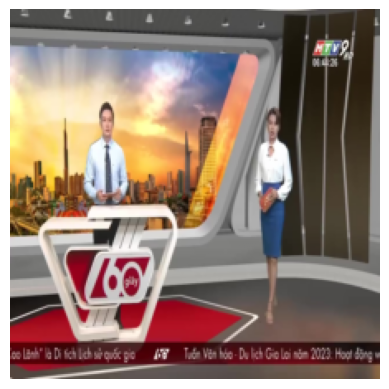

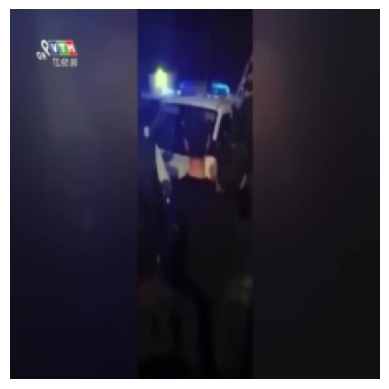

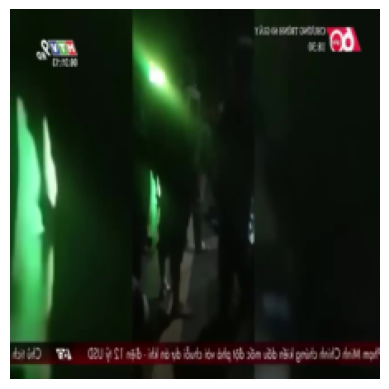

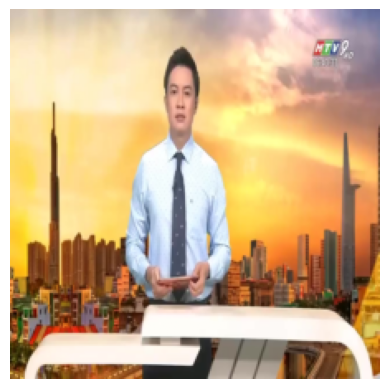

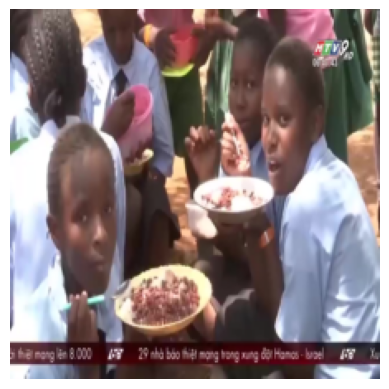

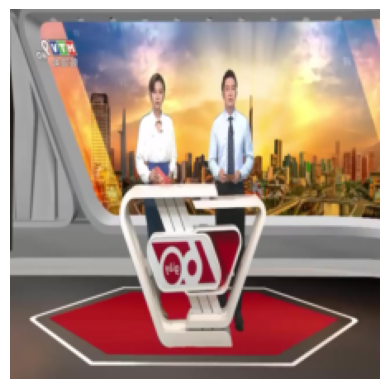

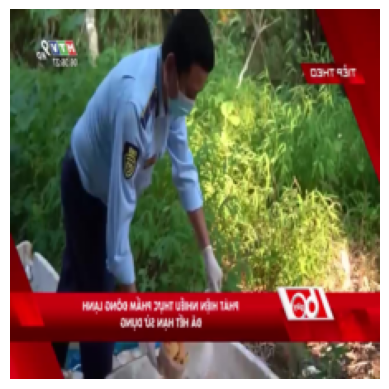

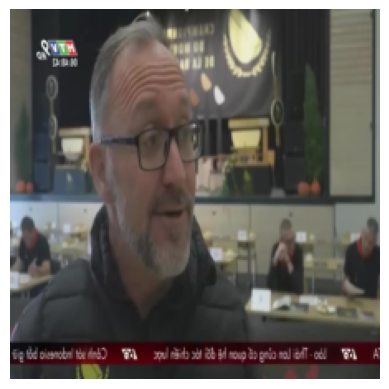

In [9]:
# 👁️ Step 6: Visualize Sample Batch
def imshow(img_tensor):
    img = img_tensor.permute(1, 2, 0)  # Convert [C, H, W] to [H, W, C]
    img = img * torch.tensor([0.229, 0.224, 0.225]) + torch.tensor([0.485, 0.456, 0.406])  # Unnormalize
    img = img.clamp(0, 1)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# Show images from one batch
images = next(iter(dataloader))
for i in range(len(images)):
    imshow(images[i])

In [11]:
import torchvision.transforms.functional as TF

save_dir = "D:/Summer_2025/AIC/Data/Processed/"
os.makedirs(save_dir, exist_ok=True)

for i, path in enumerate(image_paths):
    img = Image.open(path).convert('RGB')
    img_transformed = transform(img)  # This is a tensor

    # Convert back to PIL image (unnormalized for visualization)
    img_pil = TF.to_pil_image(img_transformed)

    # Save it
    filename = os.path.basename(path)
    img_pil.save(os.path.join(save_dir, filename))

print("Processed images saved to:", save_dir)


Processed images saved to: D:/Summer_2025/AIC/Data/Processed/
